# Practicum 4: Exploring Data



## Task 3: Discretization

 - Create an ordinal attribute `file size` with the following 5 possible values
   {tiny, small, medium, large, huge}.
 - Implement both the equal width and equal frequency methods.
 - Display the data on a plot.

We import the matplotlib submodule **pyplot**, to plot 2d graphics;
following a widely used convention, we use the `plt` alias.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

We will use the **csv** module for reading in data from a file.

We also need the **math** module for computing log.

In [2]:
import csv
import math

This function returns k split-points using the equal width method.
I.e., the distance between the split points is the same.

In [3]:
def splits_equalwidth():
    min_x = min(x)
    max_x = max(x)
    split_size = (max_x - min_x) / k
    split_points = []
    for i in range(k-1):
        sp = split_size * (i + 1)
        split_points.append(sp)
    return split_points

This function returns k split-points using the equal frequency method.
I.e., all splits have the same number of elements.

In [7]:
def splits_equalfreq():
    split_points = []
    split_freq = len(x) / k  # this is how many elements we want in each split
    freq = 0                 # how many elements we have in the current split
    for val in sorted(x):    # iterate the points sorted by x value
        freq += 1
        if freq >= split_freq:
            split_points.append(val)
            freq = 0
    return split_points

### Read data from file

The first attribute will be shown on the x dimension, the second on the y dimension.
We know that the first attribute is the file size. We take the log of the value as it might be more meaningful for certain applications.

The meaning of the second attribute is not important for this exercise.

In [9]:
x = []
y = []
with open("data/task3_data.txt", 'rt') as csvfile:
    csvreader = csv.reader(csvfile, delimiter='\t')
    for row in csvreader:
        if len(row) == 2:                      # if we have 2 fields in that line
            x.append(math.log(float(row[0])))  # we take the log of the values
            y.append(row[1])

### Plot original data

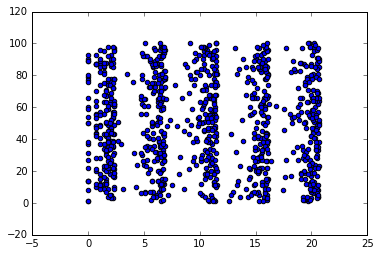

In [11]:
plt.clf()  # this is needed to clear the current figure (prevents multiple labels)
plt.scatter(x, y)
plt.show()

### Discretize data

This is the number of splits we want.
We will need to find `k-1` split points. The `splits` variable will hold those.

In [12]:
k = 3

This list defines the colors. Note that we need k colors in total.

In [13]:
colors = ["red", "green", "blue", "cyan", "magenta"]

#### Determine split points using equal width method.

In [15]:
splits = splits_equalwidth()
print(splits)

[6.90689808943207, 13.81379617886414]


We assign the points to the corresponding category by setting the color.

In [16]:
c = []
for i in range(len(x)):
    cat = 0
    while cat < len(splits) and x[i] > splits[cat]:
        cat += 1
    c.append(colors[cat])

Plot discretized data.

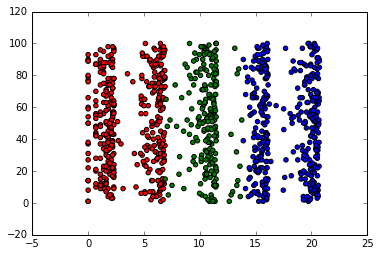

In [17]:
plt.clf()  # this is needed to clear the current figure (prevents multiple labels)
plt.scatter(x, y, c=c)
plt.show()

#### Determine split points using equal frequency method.

In [18]:
splits = splits_equalfreq()
print(splits)

[6.401917196727186, 15.009069930222225]


We assign the points to the corresponding category by setting the color.

In [19]:
c = []
for i in range(len(x)):
    cat = 0
    while cat < len(splits) and x[i] > splits[cat]:
        cat += 1
    c.append(colors[cat])

Plot discretized data.

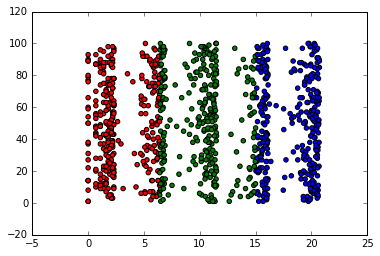

In [20]:
plt.clf()  # this is needed to clear the current figure (prevents multiple labels)
plt.scatter(x, y, c=c)
plt.show()